# ANALYSING THE DATA 

In [1]:
#Lets import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cms_dataset = pd.read_csv("/kaggle/input/cms-dataset/CMS_trigger.csv")
#lets load the csv file 

In [4]:
cms_dataset.shape

(1179356, 35)

In [5]:
cms_dataset.columns

Index(['Unnamed: 0', 'Phi_0', 'Phi_2', 'Phi_3', 'Phi_4', 'Theta_0', 'Theta_2',
       'Theta_3', 'Theta_4', 'BendingAngle_0', 'BendingAngle_2',
       'BendingAngle_3', 'BendingAngle_4', 'TimeInfo_0', 'TimeInfo_2',
       'TimeInfo_3', 'TimeInfo_4', 'RingNumber_0', 'RingNumber_2',
       'RingNumber_3', 'RingNumber_4', 'Front_0', 'Front_2', 'Front_3',
       'Front_4', 'Mask_0', 'Mask_2', 'Mask_3', 'Mask_4',
       'PatternStraightness', 'Zone', 'MedianTheta', 'q/pt', 'PhiAngle',
       'EtaAngle'],
      dtype='object')

**These are the features of each muon event. We can see that there are 35 columns, but out of this the first one is the index column and the q/pt would be the target ie momentum of the muon particle that we are going to estimate through the model.**

In [6]:
print(cms_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179356 entries, 0 to 1179355
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1179356 non-null  int64  
 1   Phi_0                1179356 non-null  float64
 2   Phi_2                1179356 non-null  float64
 3   Phi_3                1179356 non-null  float64
 4   Phi_4                1179356 non-null  float64
 5   Theta_0              1179356 non-null  float64
 6   Theta_2              1179356 non-null  float64
 7   Theta_3              1179356 non-null  float64
 8   Theta_4              1179356 non-null  float64
 9   BendingAngle_0       1179356 non-null  float64
 10  BendingAngle_2       1179356 non-null  float64
 11  BendingAngle_3       1179356 non-null  float64
 12  BendingAngle_4       1179356 non-null  float64
 13  TimeInfo_0           1179356 non-null  float64
 14  TimeInfo_2           1179356 non-null  float64
 15

In [7]:
print(cms_dataset.describe())

         Unnamed: 0         Phi_0         Phi_2         Phi_3         Phi_4  \
count  1.179356e+06  1.179356e+06  1.179356e+06  1.179356e+06  1.179356e+06   
mean   5.896775e+05  4.851559e+01  4.851127e+01  4.851076e+01  4.851331e+01   
std    3.404509e+05  1.774647e+01  1.779697e+01  1.781670e+01  1.779750e+01   
min    0.000000e+00  1.103333e+01  2.400000e+00  2.666667e+00  2.666667e+00   
25%    2.948388e+05  3.371667e+01  3.360000e+01  3.360000e+01  3.360000e+01   
50%    5.896775e+05  4.830000e+01  4.826667e+01  4.826667e+01  4.826667e+01   
75%    8.845162e+05  6.326667e+01  6.303333e+01  6.293333e+01  6.296667e+01   
max    1.179355e+06  8.311667e+01  8.256667e+01  8.253333e+01  8.253333e+01   

            Theta_0       Theta_2       Theta_3       Theta_4  BendingAngle_0  \
count  1.179356e+06  1.179356e+06  1.179356e+06  1.179356e+06    1.179356e+06   
mean   6.195453e+00  5.918753e+00  5.848332e+00  5.881490e+00    5.603115e-02   
std    3.011983e+00  2.921076e+00  2.911875e+

In [8]:
#Lets check if there are any missing values
missing_values = cms_dataset.isnull().sum()
print(missing_values)

Unnamed: 0             0
Phi_0                  0
Phi_2                  0
Phi_3                  0
Phi_4                  0
Theta_0                0
Theta_2                0
Theta_3                0
Theta_4                0
BendingAngle_0         0
BendingAngle_2         0
BendingAngle_3         0
BendingAngle_4         0
TimeInfo_0             0
TimeInfo_2             0
TimeInfo_3             0
TimeInfo_4             0
RingNumber_0           0
RingNumber_2           0
RingNumber_3           0
RingNumber_4           0
Front_0                0
Front_2                0
Front_3                0
Front_4                0
Mask_0                 0
Mask_2                 0
Mask_3                 0
Mask_4                 0
PatternStraightness    0
Zone                   0
MedianTheta            0
q/pt                   0
PhiAngle               0
EtaAngle               0
dtype: int64


In [9]:
#There are no missing values in the dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

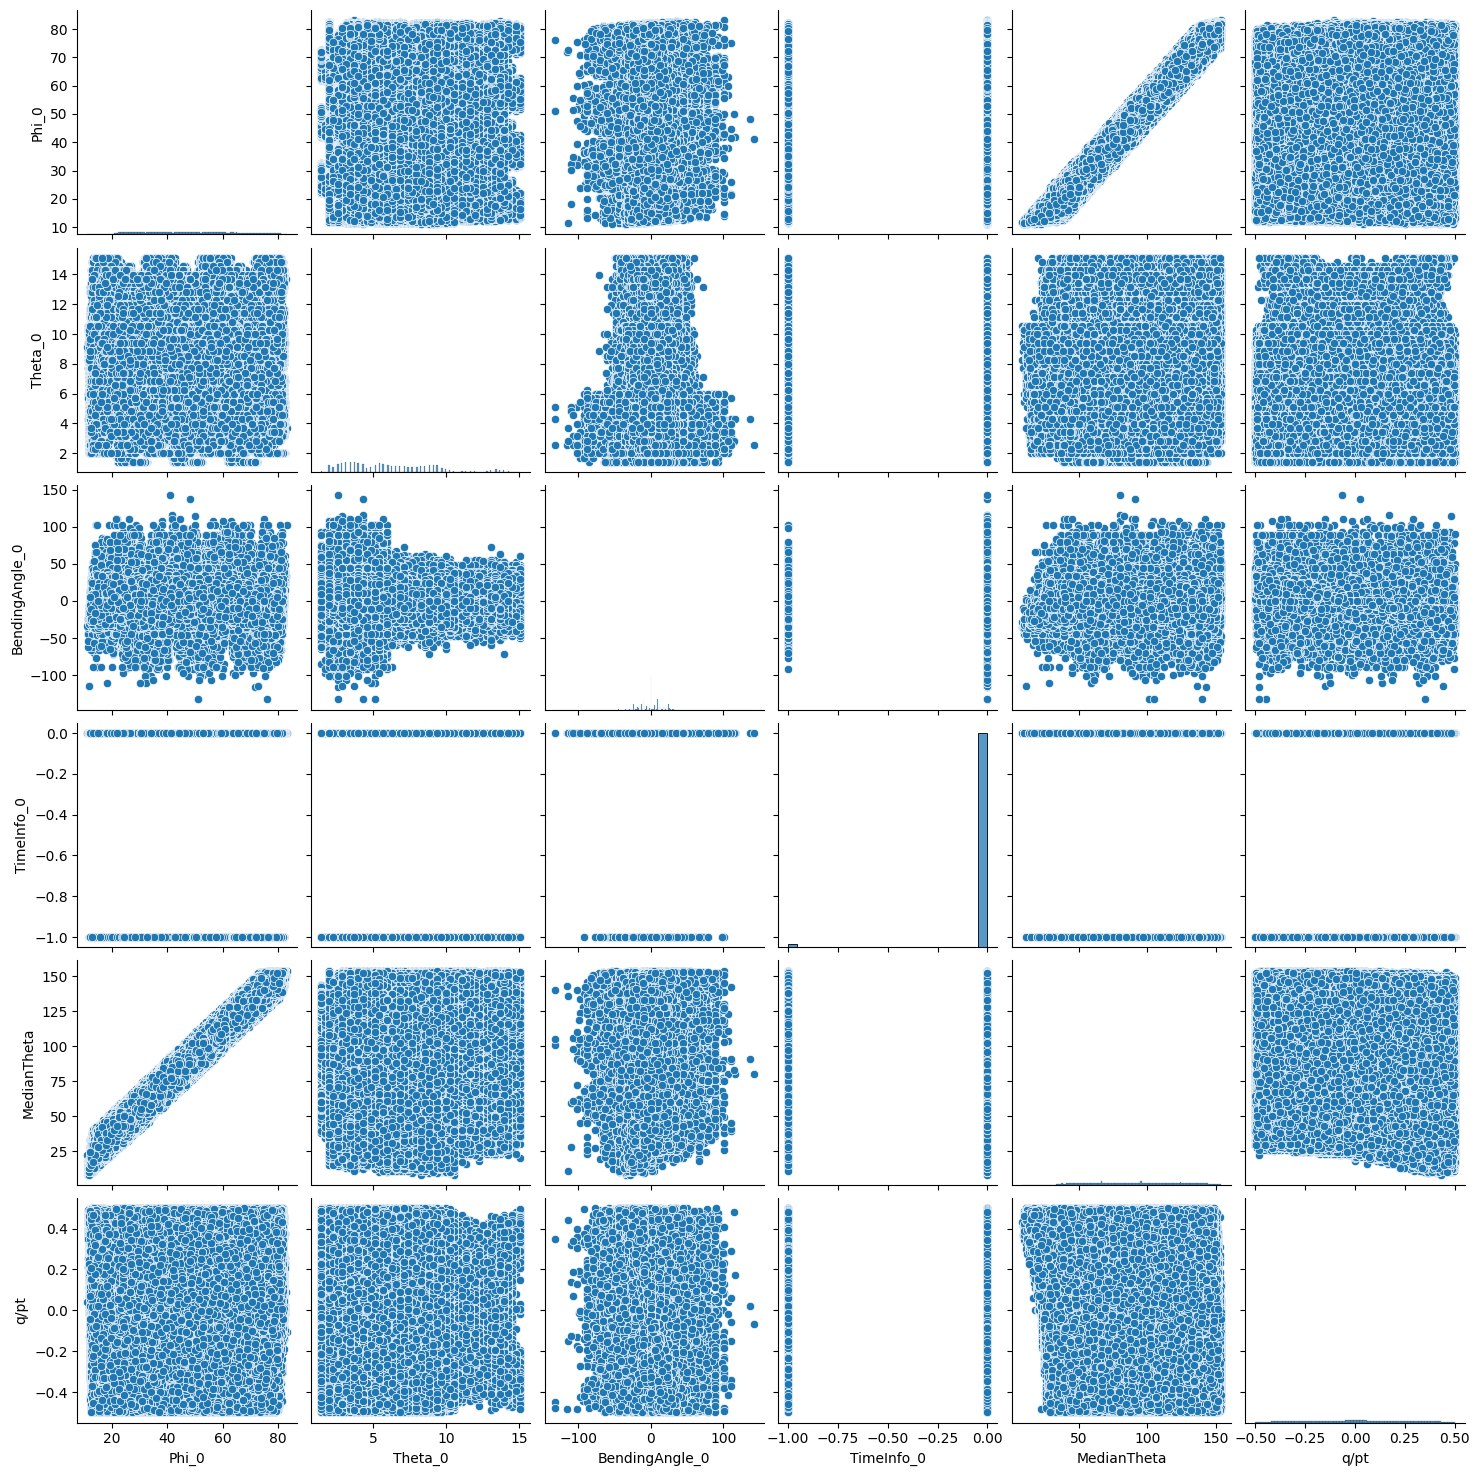

In [10]:
# Select a subset of features to avoid overplotting
subset_features = ['Phi_0', 'Theta_0', 'BendingAngle_0', 'TimeInfo_0', 'MedianTheta', 'q/pt']

sns.pairplot(cms_dataset[subset_features])
plt.show()

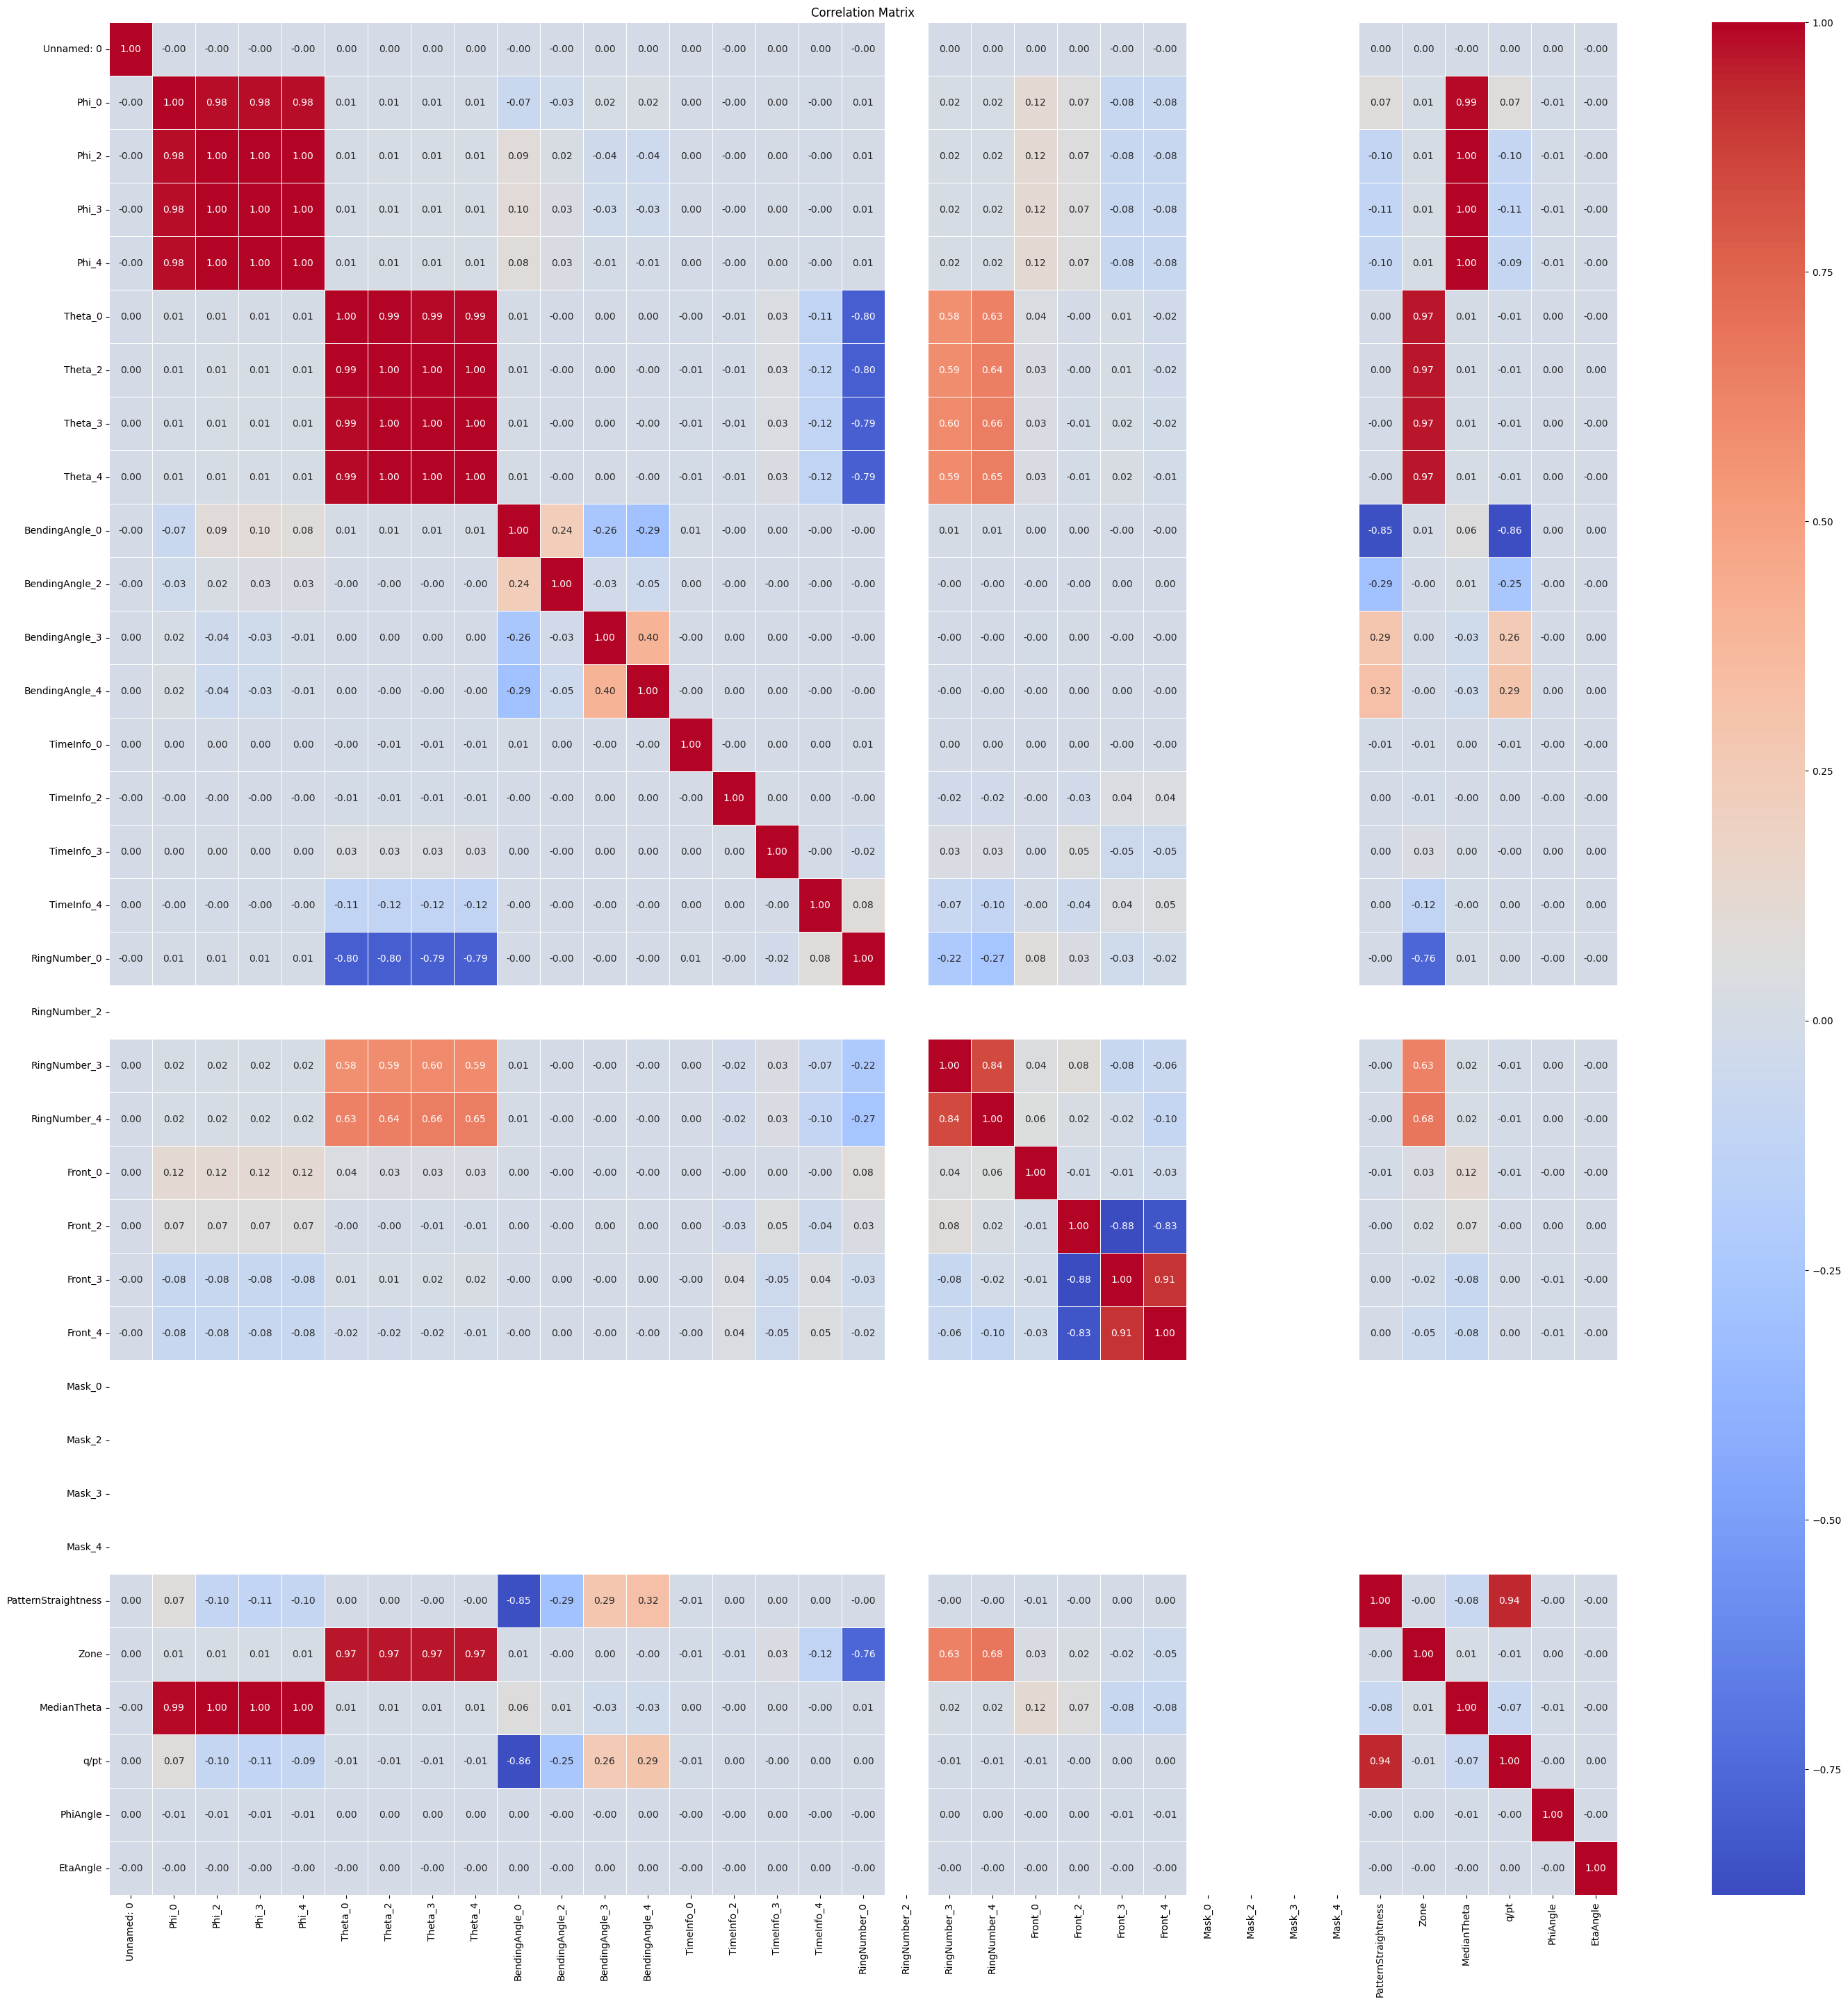

In [11]:
corr_matrix = cms_dataset.corr()

# Plot the correlation matrix
plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('/kaggle/working/correlation_matrix.png', bbox_inches='tight')
plt.show()

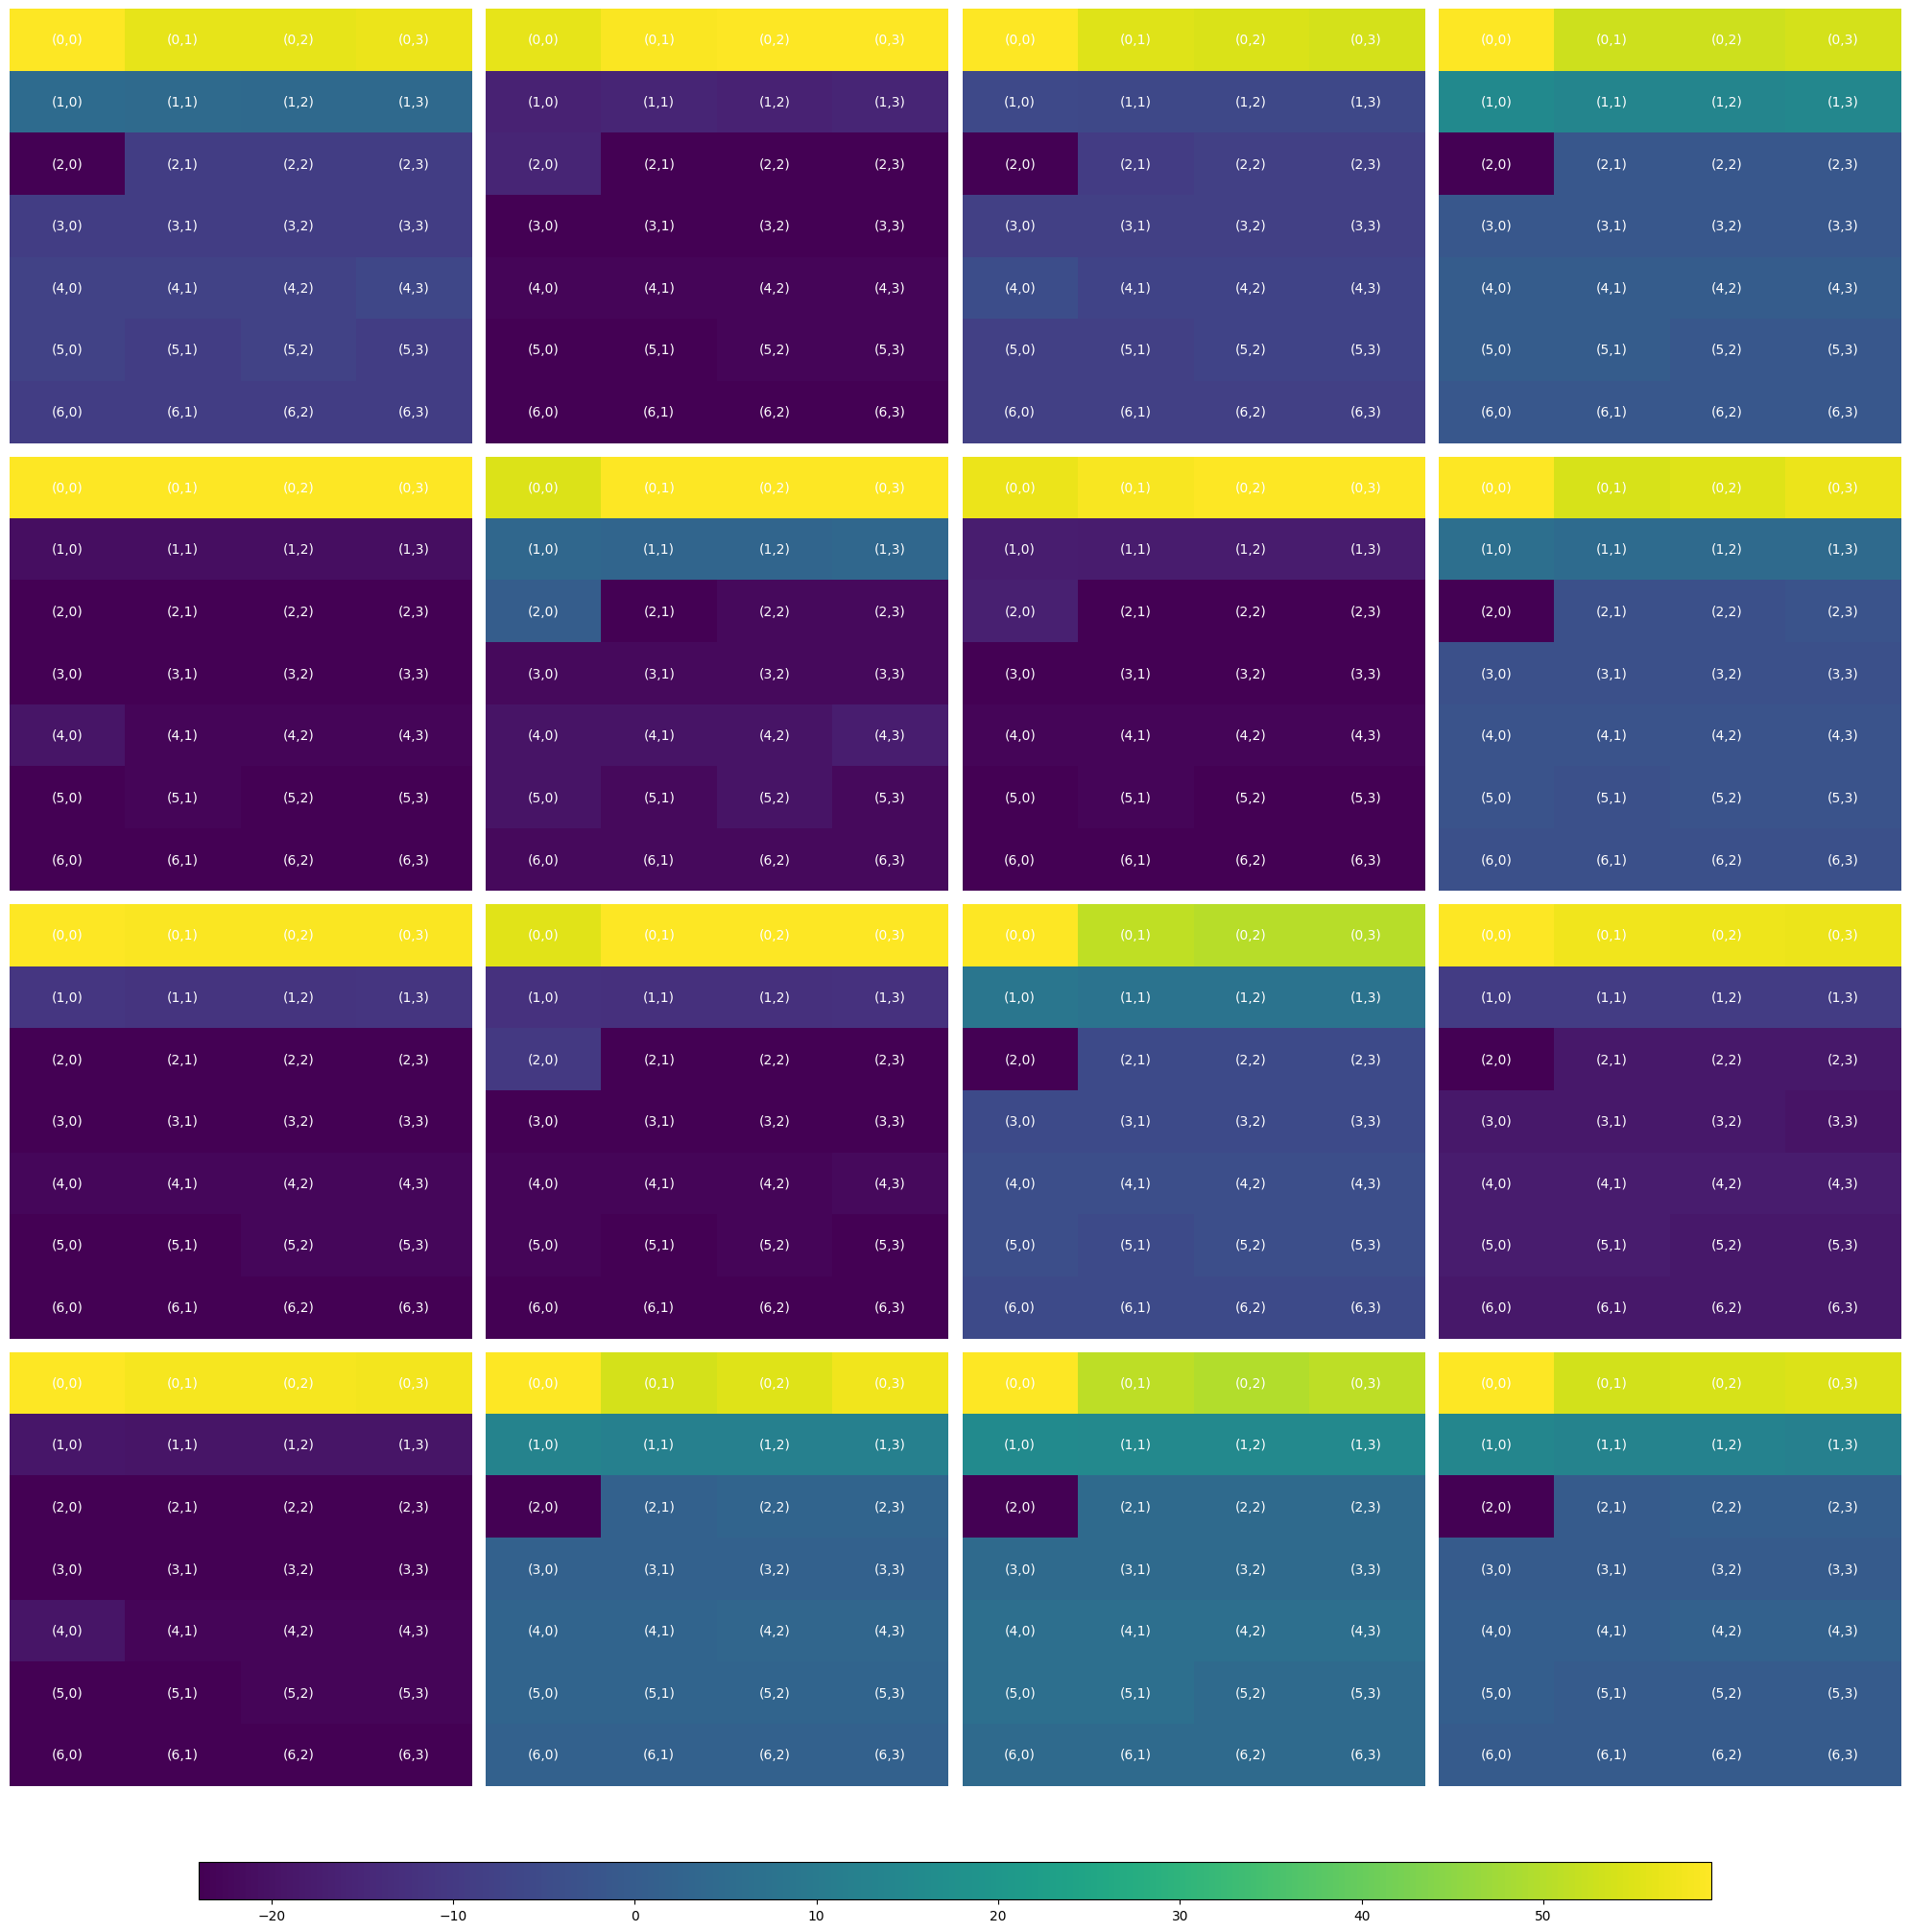

In [12]:
# Select the specified columns
columns = ['Phi_0', 'Phi_2', 'Phi_3', 'Phi_4', 
           'Theta_0', 'Theta_2', 'Theta_3', 'Theta_4', 
           'BendingAngle_0', 'BendingAngle_2', 'BendingAngle_3', 'BendingAngle_4', 
           'TimeInfo_0', 'TimeInfo_2', 'TimeInfo_3', 'TimeInfo_4', 
           'RingNumber_0', 'RingNumber_2', 'RingNumber_3', 'RingNumber_4', 
           'Front_0', 'Front_2', 'Front_3', 'Front_4', 
           'Mask_0', 'Mask_2', 'Mask_3', 'Mask_4']

# Extract the subset of the dataset
data_subset = cms_dataset[columns]

def plot_row_as_image(row, ax):
    # Reshape the row into a 7x4 matrix
    image = row.values.reshape((7, 4))
#     print(image.shape)
    # Display the image
    cax = ax.imshow(image, cmap='viridis', aspect='auto')
    ax.axis('off')  # Hide the axes
    
    # Annotate the image with row and column numbers
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            ax.text(j, i, f'({i},{j})', ha='center', va='center', color='white')
    
    return cax

# Number of rows and columns to plot
num_rows_to_plot = 4
num_columns_to_plot = 4

# Set up the plot
fig, axes = plt.subplots(nrows=num_rows_to_plot, ncols=num_columns_to_plot, figsize=(20, 20))

# Plot each row
cax = None
for i in range(num_rows_to_plot):
    for j in range(num_columns_to_plot):
        cax = plot_row_as_image(data_subset.iloc[i * num_columns_to_plot + j], axes[i, j])

# Adjust layout
plt.tight_layout()

# Add a color bar
fig.colorbar(cax, ax=axes, orientation='horizontal', fraction=0.02, pad=0.04, aspect=40)
plt.savefig('/kaggle/working/data_as_image_smaller_one.png', bbox_inches='tight')
plt.show()

Seeing the images we see that the rows are almost the same and hence we taking the rows as the features of something will be a bad idea.

Therefore we give more priority for the graph nodes further when we are creating to have 7 features and just 4 nodes instead of the reverse that is 7 nodes and just 4 features

In [13]:
#LETS NORMALIZE THE MATRIX AND SAVE IT AS AN IMAGE

In [14]:
import os
from PIL import Image
from tqdm import tqdm

In [15]:
output_dir = '/kaggle/working/Images_normalized'  # Update this with the actual path where you want to save the images
os.makedirs(output_dir, exist_ok=True)

# Function to convert a single row into a 7x4 image and save it
def save_row_as_image(row, idx, output_dir):
    # Reshape the row into a 7x4 matrix
    matrix = row.values.reshape((7, 4))
    
    # Normalize the matrix to the range [0, 255]
    matrix_normalized = (255 * (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))).astype(np.uint8)
    
    # Convert the matrix to an image
    img = Image.fromarray(matrix_normalized, mode='L')
    
    # Save the image
    image_path = os.path.join(output_dir, f'row_{idx}.png')
    img.save(image_path)

# Iterate over each row and save the image
for idx, row in tqdm(data_subset.iterrows()):
    save_row_as_image(row, idx, output_dir)

print(f"Images saved in {output_dir}")

1179356it [07:02, 2792.38it/s]

Images saved in /kaggle/working/Images_normalized
